## The Effect of Social Media Presence on Stock Price of the Coca Cola (KO) Stock

In [39]:
!pip3 install yahoo-finance
!pip3 install urllib3
!pip3 install bs4
!pip3 install pandas
!pip3 install seaborn
!pip3 install pandas-datareader
!pip3 install plotly

In [40]:
import numpy as np
from datascience import *
import csv
import urllib.request
import pandas as pd
import pandas_datareader.data as fetch
import datetime
import seaborn as sbn

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Importing Social Media Follower Data
The code below is where we imported the social media follower data over time, which was done in Excel and exported as a CSV, and then imported as a Python array.

In [41]:
with open('cocacoladata.csv', 'r') as f:
  reader = csv.reader(f)
  followers = list(reader)

### Getting Stock Data
The code below is a method that we wrote to get stock price for the Coca Cola (KO) stock over time using the Yahoo Finance API. The method in question takes in a symbol, start date, and end date, meaning that it can be used for any stock symbol over any period of time.

In [42]:
#followers
def adj_price(symbols, start_date, end_date):
    stock_adj_price = pd.DataFrame()
    for s in symbols:
        try:
            data = fetch.DataReader(s, 'yahoo', start_date, end_date)
            stock_adj_price[s] = data['Adj Close']
        except:
            print('Failed to fetch stock data from Yahoo Finance.')
    return stock_adj_price

### Testing our method
In this piece of the code, we graph the stock price over time (which has points for every day that the stock market was open) from 2008 to 2017.

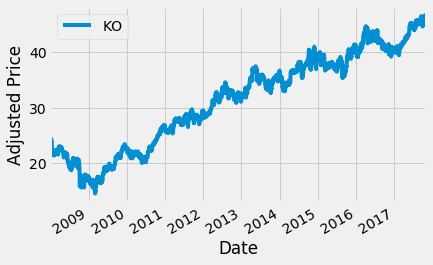

In [43]:
start_date = datetime.datetime(2008, 1, 1)
end_date = datetime.datetime(2017, 11, 1)
symbols = ['KO']
adj_price_portfolio = adj_price(symbols, start_date, end_date)

adj_price_portfolio.plot()
plt.xlabel('Date') # X-Axis label
plt.ylabel('Adjusted Price') # Y-Axis label
#plt.tight_layout()  # Removes padding
plt.show() # Show the plot window

### Data Cleaning
Because we don't want stock price data every day, but only once per month, this is the cell where we clean the data so that we only get a price for once per month, and place it into a Python array instead of a list. The cell below is where we create the table for social media followers.

In [44]:
prices = [adj_price_portfolio['KO'][i] for i in range(len(adj_price_portfolio['KO']))]
final_stock = make_array()
prices = prices[::21]
for price in prices:
    final_stock = np.append(final_stock, price)
final_stock = np.append(final_stock, 45.5)
stock = final_stock

In [45]:
twitter = make_array()
instagram = make_array()
youtube = make_array()

for month in followers:
    twitter = np.append(twitter, float(month[1]))
    instagram = np.append(instagram, float(month[3]))
    youtube = np.append(youtube, float(month[2]))
    
follower_data = Table().with_columns(
    "Number", np.arange(119),
    #"Date", dates_array,
    "Twitter Followers", twitter,
    "Instagram Followers", instagram,
    "YouTube Followers", youtube
)

follower_data.show()

Number,Twitter Followers,Instagram Followers,YouTube Followers
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,0,0,0
9,0,0,0


### Data Analysis
In this cell, we did some data analysis where we calculated the growth rate for each set of months for social media followers for Twitter, Instagram, and YouTube, as well as stock data.

In [46]:
twitter_growth = [((twitter[i+1] - twitter[i])/twitter[i]) for i in range(0, 118) if twitter[i] != 0]
twitter_growth = [0 for i in range(15)] + twitter_growth
#print(len(twitter_growth))

instagram_growth = [((instagram[i+1] - instagram[i])/instagram[i]) for i in range(0, 118) if instagram[i] != 0]
instagram_growth = [0 for i in range(59)] + instagram_growth
#print(len(instagram_growth))

youtube_growth = [((youtube[i+1] - youtube[i])/youtube[i]) for i in range(0, 118) if youtube[i] != 0]
youtube_growth = [0 for i in range(20)] + youtube_growth
#print(len(youtube_growth))

stock_growth = [((stock[i+1] - stock[i])/stock[i]) for i in range(0, 118) if stock[i] != 0]
#print(len(stock_growth))

twitter_growth_a = make_array()
for dat1 in twitter_growth:
    twitter_growth_a = np.append(twitter_growth_a, dat1)
    
instagram_growth_a = make_array()
for dat2 in instagram_growth:
    instagram_growth_a = np.append(instagram_growth_a, dat2)
    
youtube_growth_a = make_array()
for dat3 in youtube_growth:
    youtube_growth_a = np.append(youtube_growth_a, dat3)
    
stock_growth_a = make_array()
for dat4 in stock_growth:
    stock_growth_a = np.append(stock_growth_a, dat4 * 5)
    
dates_list = [[str(day) + "/" + str(year) for day in range(1, 13)] for year in range(2008, 2018)]

dates_list_2 = []
for year in dates_list:
    dates_list_2 += year
dates_list_2.pop()

dates_array = make_array()
for year in dates_list_2:
    dates_array = np.append(dates_array, year)

### Data Visualization
In this stage, we have all the data how we want it, and need to start visualizing it. First, we put all of the data in a Python table so it can be graphed. We also adjusted the offsets so that the lines of the graph would be overlaid and trends could be properly compared.

"stock_data.plot('Months Since January 2008')\nplt.xlabel('Months since January 2008')\nplt.ylabel('Stock Price')"

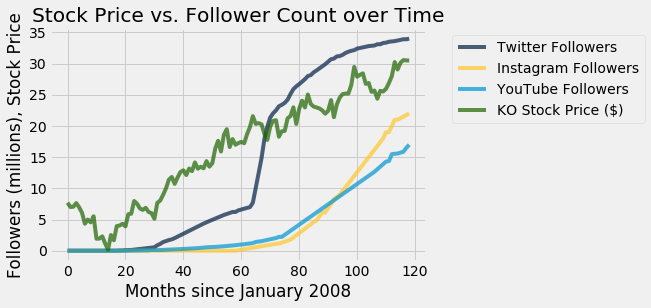

In [47]:
follower_data = Table().with_columns(
    "Months Since January 2008", np.arange(119),
    #"Date", dates_array,
    "Twitter Followers", twitter / 100000,
    "Instagram Followers", instagram / 100000,
    "YouTube Followers", youtube / 100000,
    "KO Stock Price ($)", stock - 15,
)
follower_data.plot('Months Since January 2008')
plt.xlabel('Months since January 2008')
plt.ylabel('Followers (millions), Stock Price')
plt.title('Stock Price vs. Follower Count over Time')

stock_data = Table().with_columns(
    "Months Since January 2008", np.arange(119),
    "KO Stock Price ($)", stock
)

"""stock_data.plot('Months Since January 2008')
plt.xlabel('Months since January 2008')
plt.ylabel('Stock Price')"""

Below is a different visualization in which we can see the growth rate over the months that we gathered data for. 

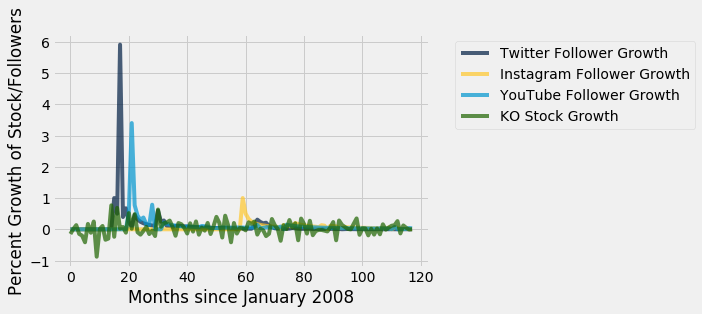

In [48]:
follower_data_growth = Table().with_columns(
    "Months Since January 2008", np.arange(118),
    "Date", dates_array[1:],
    "Twitter Follower Growth", twitter_growth_a,
    "Instagram Follower Growth", instagram_growth_a,
    "YouTube Follower Growth", youtube_growth_a,
    "KO Stock Growth", stock_growth_a
)
follower_data_growth.drop(1).plot('Months Since January 2008')
plt.xlabel('Months since January 2008')
plt.ylabel('Percent Growth of Stock/Followers')

In [49]:
def get_data(row_count):
    temp = follower_data_growth.take(np.arange(row_count, row_count + 20))
    return temp.drop(1).plot('Months Since January 2008')

In [50]:
import ipywidgets as widgets

_ = widgets.interact(get_data, 
                     row_count=widgets.IntSlider(min=0, max=20, value=0))

interactive(children=(IntSlider(value=0, description='row_count', max=20), Output()), _dom_classes=('widget-interact',))